In [34]:
import pandas as pd

In [35]:
diabetes_overfit = pd.read_csv("diabetes.csv")

In [36]:
diabetes_overfit.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [37]:
diabetes_overfit.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [38]:
diabetes_overfit['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [39]:
diabetes_overfit.drop('smoking_history', axis=1, inplace=True)


In [40]:
diabetes_overfit.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0  Female  80.0             0              1  25.19          6.6   
1  Female  54.0             0              0  27.32          6.6   
2    Male  28.0             0              0  27.32          5.7   
3  Female  36.0             0              0  23.45          5.0   
4    Male  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  
0                  140         0  
1                   80         0  
2                  158         0  
3                  155         0  
4                  155         0

Encode The Gender

In [41]:
diabetes_overfit['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [42]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [43]:
diabetes_overfit = diabetes_overfit[diabetes_overfit['gender'] != 'Other']

In [44]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
dtype: int64

In [45]:
diabetes_overfit.groupby('diabetes').size()

diabetes
0    91482
1     8500
dtype: int64

In [46]:
class_1 = diabetes_overfit[diabetes_overfit['diabetes'] == 1]
class_0 = diabetes_overfit[diabetes_overfit['diabetes'] == 0].sample(n=8500, random_state=42)
diabetes = pd.concat([class_0, class_1])
diabetes.groupby('diabetes').size()


diabetes
0    8500
1    8500
dtype: int64

In [47]:
diabetes.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
50974  Female  80.0             0              0  27.32          6.1   
62503    Male  15.0             0              0  19.89          6.6   
306    Female  80.0             0              1  21.30          5.0   
86797  Female  25.0             0              0  27.32          4.0   
3762     Male  17.0             0              0  27.24          6.2   

       blood_glucose_level  diabetes  
50974                  159         0  
62503                  159         0  
306                    159         0  
86797                  130         0  
3762                   160         0

In [48]:
# diabetes['gender'].replace(['Female','Male'],[0,1],inplace = True)

In [49]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
diabetes['gender'] = lable_encoder.fit_transform(diabetes['gender'])
diabetes['gender'].unique()

array([0, 1])

In [50]:
diabetes.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
50974       0  80.0             0              0  27.32          6.1   
62503       1  15.0             0              0  19.89          6.6   
306         0  80.0             0              1  21.30          5.0   
86797       0  25.0             0              0  27.32          4.0   
3762        1  17.0             0              0  27.24          6.2   

       blood_glucose_level  diabetes  
50974                  159         0  
62503                  159         0  
306                    159         0  
86797                  130         0  
3762                   160         0

<Axes: >

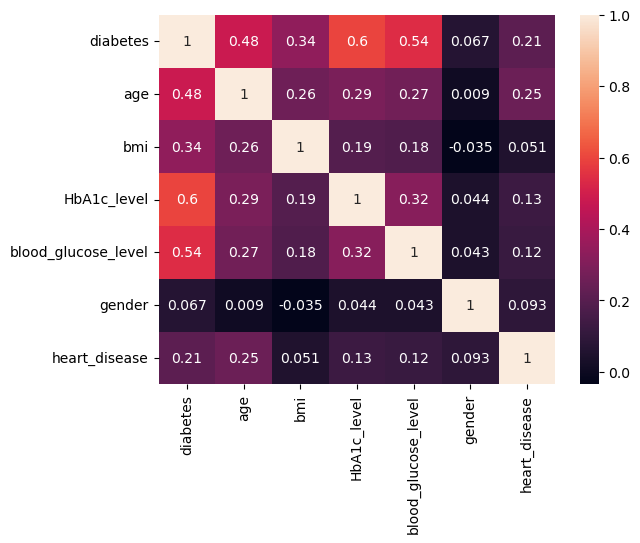

In [51]:
import seaborn as sns

sns.heatmap(diabetes[['diabetes','age','bmi','HbA1c_level','blood_glucose_level','gender','heart_disease']].corr(),annot = True)

<Axes: >

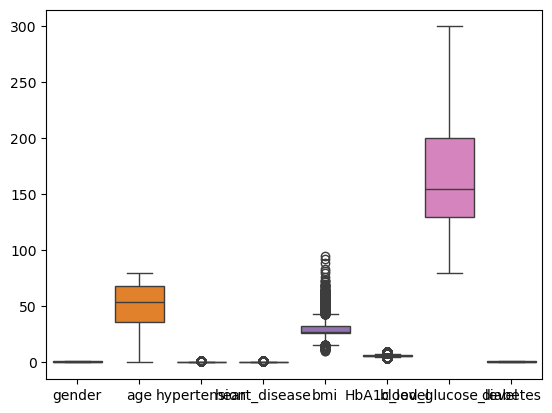

In [52]:
sns.boxplot(diabetes)

In [53]:
import numpy as np

# Assuming 'bmi' is the name of the column containing the BMI values in your DataFrame
bmi_values = diabetes['bmi']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(bmi_values, 25)
Q3 = np.percentile(bmi_values, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = sum((bmi_values < lower_bound) | (bmi_values > upper_bound))

print("Number of outliers in BMI feature:", outliers_count)


Number of outliers in BMI feature: 1041


In [54]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 50974 to 99979
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  int32  
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   bmi                  17000 non-null  float64
 5   HbA1c_level          17000 non-null  float64
 6   blood_glucose_level  17000 non-null  int64  
 7   diabetes             17000 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.1 MB


Imputing Outliers

In [55]:
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(diabetes['bmi'], 25)
Q3 = np.percentile(diabetes['bmi'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
diabetes_cleaned = diabetes[(diabetes['bmi'] >= lower_bound) & (diabetes['bmi'] <= upper_bound)]

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Shape of original DataFrame:", diabetes.shape)
print("Shape of cleaned DataFrame:", diabetes_cleaned.shape)


Shape of original DataFrame: (17000, 8)
Shape of cleaned DataFrame: (15959, 8)


<Axes: >

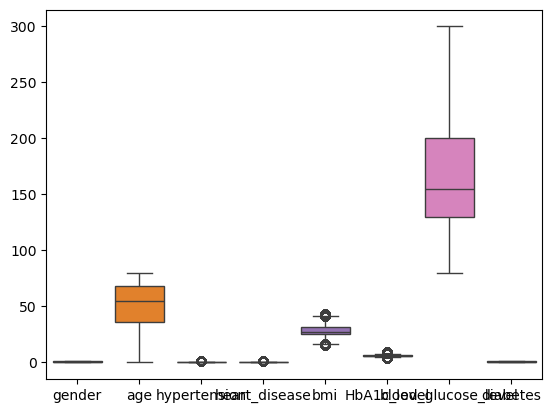

In [56]:
sns.boxplot(diabetes_cleaned)

In [57]:
X = diabetes_cleaned.drop(['diabetes'], axis = 1)
y = diabetes_cleaned['diabetes']

In [58]:
X.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
50974       0  80.0             0              0  27.32          6.1   
62503       1  15.0             0              0  19.89          6.6   
306         0  80.0             0              1  21.30          5.0   
86797       0  25.0             0              0  27.32          4.0   
3762        1  17.0             0              0  27.24          6.2   

       blood_glucose_level  
50974                  159  
62503                  159  
306                    159  
86797                  130  
3762                   160

In [59]:
y.head()

50974    0
62503    0
306      0
86797    0
3762     0
Name: diabetes, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.6,random_state=42)

In [61]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [62]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
linear_model = tf.keras.models.Sequential()
linear_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
linear_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
linear_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
linear_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = linear_model.fit(X_train, y_train, epochs=100, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 0.5822 - accuracy: 0.6722 - val_loss: 0.4153 - val_accuracy: 0.8427
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8646 - val_loss: 0.2817 - val_accuracy: 0.8716
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.8743 - val_loss: 0.2669 - val_accuracy: 0.8764
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.8776 - val_loss: 0.2645 - val_accuracy: 0.8769
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.8790 - val_loss: 0.2615 - val_accuracy: 0.8802
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 0.8805 - val_loss: 0.2598 - val_accuracy: 0.8806
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.8823 - val_loss: 0.2585 - val_accuracy: 0.8814

linear_model.score(X_test, y_test)

In [63]:
predict = linear_model.predict(X_test)

200/200 [==============================] - 0s 1ms/step


case_predict = linear_model.predict([[0 ,20.0 ,0 ,0 ,36.96 ,6.6 ,200 ]])
print(case_predict)
if case_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

In [64]:
print(predict)

[[9.9966305e-01]
 [9.7519165e-04]
 [5.9787158e-07]
 ...
 [4.2883882e-01]
 [9.9726319e-01]
 [7.2205615e-01]]


In [65]:
import pickle

#saving the model and encoder

data = {"linear_model": linear_model,"lable_encoder": lable_encoder }
with open('linear_regression_model3.pkl','wb') as file:
    pickle.dump(data,file)

INFO:tensorflow:Assets written to: ram://af5f8eda-4b06-4d5e-a3a8-13028e35124a/assets


In [ ]:
import joblib
joblib.dump(linear_model,'linear_regression_model.pkl')
joblib.dump(stand,'standard_scaler.pkl')

INFO:tensorflow:Assets written to: ram://a5c2b5bd-2b1a-44e7-96b9-64b055ccda1e/assets


['linear_regression_model.pkl']

In [67]:
import tensorflow as tf
path = './model.h5'
linear_model.save(path )
loaded_model= tf.keras.models.load_model(path )
